In [1]:
import os
import numpy as np
import itertools
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
df15 = pd.read_csv("../../Dataset/21-02-2018(Time).csv", low_memory = False)
df15 = df15.drop([0,1])
df15['Timestamp']= pd.to_datetime(df15['Timestamp'])
df15 = df15.sort_values(by=['Timestamp'])
df15 = df15.drop(columns = ['Timestamp'])

In [3]:
df15

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
3931,22623.0,6.0,1570084.0,4.0,4.0,384.0,64.0,128.0,64.0,96.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3877,500.0,17.0,117573217.0,3.0,0.0,1500.0,0.0,500.0,500.0,500.0,...,8.0,0.0,0.0,0.0,0.0,58800000.0,23800000.0,75600000.0,42000000.0,Benign
3876,500.0,17.0,117573216.0,3.0,0.0,1500.0,0.0,500.0,500.0,500.0,...,8.0,0.0,0.0,0.0,0.0,58800000.0,23800000.0,75600000.0,42000000.0,Benign
3874,1920.0,6.0,61535899.0,5.0,6.0,1017.0,20.0,976.0,0.0,203.4,...,32.0,17446.0,0.0,17446.0,17446.0,61400000.0,0.0,61400000.0,61400000.0,Benign
3872,22.0,6.0,57276.0,5.0,4.0,20.0,1017.0,20.0,0.0,4.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3724,80.0,17.0,673969.0,4098.0,0.0,131136.0,0.0,32.0,32.0,32.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDOS attack-LOIC-UDP
3693,80.0,17.0,61002.0,2049.0,0.0,65568.0,0.0,32.0,32.0,32.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDOS attack-LOIC-UDP
3810,80.0,17.0,672151.0,4098.0,0.0,131136.0,0.0,32.0,32.0,32.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDOS attack-LOIC-UDP
3796,80.0,17.0,734701.0,4098.0,0.0,131136.0,0.0,32.0,32.0,32.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDOS attack-LOIC-UDP


In [5]:
df16Aux = pd.read_csv("../../Dataset/15-02-2018(Time).csv", low_memory = False)
df16Aux = df16Aux.drop([0,1])
df16Aux['Timestamp']= pd.to_datetime(df16Aux['Timestamp'])
df16Aux = df16Aux.sort_values(by=['Timestamp'])
df16Aux = df16Aux.drop(columns = ['Timestamp'])

In [6]:
listOrd = df15.columns.tolist()
df16 = pd.DataFrame()
for colu in listOrd:
    df16[colu] = df16Aux[colu]

In [7]:
df16Aux = None

In [8]:
df16

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
305204,3389.0,6.0,2530981.0,8.0,7.0,1128.0,1581.0,661.0,0.0,141.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
625011,445.0,6.0,562585.0,6.0,5.0,455.0,338.0,140.0,0.0,75.8333333333,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
747969,80.0,6.0,5291706.0,4.0,4.0,97.0,232.0,97.0,0.0,24.25,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
728998,80.0,6.0,93.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
728997,80.0,6.0,974.0,3.0,4.0,161.0,488.0,161.0,0.0,53.6666666667,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364710,443.0,6.0,218.0,3.0,0.0,77.0,0.0,46.0,0.0,25.6666666667,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
364711,51319.0,6.0,35.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
778527,80.0,6.0,53636845.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
929269,3389.0,6.0,2426253.0,8.0,7.0,1128.0,1581.0,661.0,0.0,141.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [9]:
input_label15 = np.array(df15.loc[:, df15.columns != "Label"]).astype(np.float)
output_label15 = np.array(df15["Label"])
out = []
for o in output_label15:
    if(o == "Benign"):out.append(0)
    else: out.append(1)
output_label15= out

In [10]:
input_label16 = np.array(df16.loc[:, df16.columns != "Label"]).astype(np.float)
output_label16 = np.array(df16["Label"])
out = []
for o in output_label16:
    if(o == "Benign"):out.append(0)
    else: out.append(1)
output_label16 = out

In [11]:
dfAE = pd.concat([df15, df16])
input_labelAE = np.array(dfAE.loc[:, dfAE.columns != "Label"]).astype(np.float)
output_labelAE = np.array(dfAE["Label"])
out = []
for o in output_labelAE:
    if(o == "Benign"):out.append(0)
    else: out.append(1)
output_labelAE = out

In [12]:
dfAE = None
df15 = None
df16 = None
out = None

In [13]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(input_labelAE)
input_label15 = scaler.transform(input_label15)
input_label16 = scaler.transform(input_label16)
input_labelAE = scaler.transform(input_labelAE)

## AutoEncoder

In [14]:
input_labelAE, output_labelAE = shuffle(input_labelAE, output_labelAE)

In [15]:
inp_train,inp_test,out_train,out_test = train_test_split(input_labelAE, input_labelAE, test_size=0.2)

In [16]:
input_model = keras.layers.Input(shape = (78,))
enc = keras.layers.Dense(units = 64, activation = "relu", use_bias = True)(input_model)
enc = keras.layers.Dense(units = 36, activation = "relu", use_bias = True)(enc)
enc = keras.layers.Dense(units = 18, activation = "relu")(enc)
dec = keras.layers.Dense(units = 36, activation = "relu", use_bias = True)(enc)
dec = keras.layers.Dense(units = 64, activation = "relu", use_bias = True)(dec)
dec = keras.layers.Dense(units = 78, activation = "relu", use_bias = True)(dec)
auto_encoder = keras.Model(input_model, dec)

In [17]:
encoder = keras.Model(input_model, enc)
decoder_input = keras.layers.Input(shape = (18,))
decoder_layer = auto_encoder.layers[-3](decoder_input)
decoder_layer = auto_encoder.layers[-2](decoder_layer)
decoder_layer = auto_encoder.layers[-1](decoder_layer)
decoder = keras.Model(decoder_input, decoder_layer)

In [18]:
auto_encoder.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00025), loss = "mean_squared_error", metrics = ['accuracy'])

In [19]:
train = auto_encoder.fit(x = np.array(inp_train), y = np.array(out_train),validation_split= 0.1, epochs = 10, verbose = 1, shuffle = True)

Epoch 1/10
47006/47006 [==============================] - 61s 1ms/step - loss: 0.0021 - accuracy: 0.7052 - val_loss: 0.0010 - val_accuracy: 0.6873
Epoch 2/10
47006/47006 [==============================] - 50s 1ms/step - loss: 9.8651e-04 - accuracy: 0.7420 - val_loss: 6.6615e-04 - val_accuracy: 0.6838
Epoch 3/10
47006/47006 [==============================] - 51s 1ms/step - loss: 6.7905e-04 - accuracy: 0.7354 - val_loss: 6.7259e-04 - val_accuracy: 0.6900
Epoch 4/10
47006/47006 [==============================] - 105s 2ms/step - loss: 6.5710e-04 - accuracy: 0.7328 - val_loss: 5.1541e-04 - val_accuracy: 0.6871
Epoch 5/10
47006/47006 [==============================] - 103s 2ms/step - loss: 5.2589e-04 - accuracy: 0.7347 - val_loss: 4.9686e-04 - val_accuracy: 0.7517
Epoch 6/10
47006/47006 [==============================] - 60s 1ms/step - loss: 4.7012e-04 - accuracy: 0.7332 - val_loss: 4.2114e-04 - val_accuracy: 0.9409
Epoch 7/10
47006/47006 [==============================] - 50s 1ms/step - los

In [20]:
predict = auto_encoder.predict(inp_test)
losses = keras.losses.mean_squared_error(out_test, predict).numpy()
total = 0
for loss in losses:
    total += loss
print(total / len(losses))

0.000421112852346774


In [21]:
inp_train = None
inp_test = None
out_train = None
out_test = None
input_labelAE = None

In [22]:
input_label15 = encoder.predict(input_label15)
input_label16 = encoder.predict(input_label16)

In [23]:
tamanhoSequencia = 10

In [24]:
inp = []
out = []
num = 0
for i in range(len(input_label15) - tamanhoSequencia + 1):
    aux = []
    for j in range(i, i + tamanhoSequencia):
        aux.append(input_label15[j])
    inp.append(aux)
    out.append(output_label15[i + tamanhoSequencia - 1])
input_label15 = inp
output_label15 = out

In [25]:
inp = []
out = []
num = 0
for i in range(len(input_label16) - tamanhoSequencia + 1):
    aux = []
    for j in range(i, i + tamanhoSequencia):
        aux.append(input_label16[j])
    inp.append(aux)
    out.append(output_label16[i + tamanhoSequencia - 1])
input_label16 = inp
output_label16 = out

In [26]:
inp = None
out = None

## Classificador

In [27]:
model = keras.Sequential([
    keras.layers.LSTM(units = 16, input_shape = ((tamanhoSequencia,18)), return_sequences = True, use_bias = True),
    keras.layers.LSTM(units = 8, return_sequences = False, use_bias = True),
    keras.layers.Dense(units = 2, activation = "softmax")
])
model.compile(optimizer= keras.optimizers.Adam(lr= 0.00025), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [28]:
model.fit(x = np.array(input_label15), y = np.array(output_label15), validation_split= 0.1, epochs = 10, verbose = 1)

Epoch 1/10
29491/29491 [==============================] - 185s 6ms/step - loss: 0.0910 - accuracy: 0.9647 - val_loss: 0.1685 - val_accuracy: 0.9831
Epoch 2/10
29491/29491 [==============================] - 180s 6ms/step - loss: 8.4096e-05 - accuracy: 1.0000 - val_loss: 0.2241 - val_accuracy: 0.9831
Epoch 3/10
29491/29491 [==============================] - 180s 6ms/step - loss: 3.7960e-05 - accuracy: 1.0000 - val_loss: 0.2584 - val_accuracy: 0.9830
Epoch 4/10
29491/29491 [==============================] - 176s 6ms/step - loss: 1.0455e-05 - accuracy: 1.0000 - val_loss: 0.2922 - val_accuracy: 0.9834
Epoch 5/10
29491/29491 [==============================] - 195s 7ms/step - loss: 2.5251e-05 - accuracy: 1.0000 - val_loss: 0.3162 - val_accuracy: 0.9834
Epoch 6/10
29491/29491 [==============================] - 182s 6ms/step - loss: 2.5500e-05 - accuracy: 1.0000 - val_loss: 0.3163 - val_accuracy: 0.9832
Epoch 7/10
29491/29491 [==============================] - 180s 6ms/step - loss: 3.1633e-06 -

In [29]:
input_label15 = None
output_label15 = None

In [30]:
resu = model.predict(np.array(input_label16))

In [31]:
res = [np.argmax(r) for r in resu]

In [32]:
cm = confusion_matrix(y_true = np.array(output_label16).reshape(len(output_label16)), y_pred = np.array(res))

In [33]:
def plot_confusion_matrix(cm, classes, normaliza = False, title = "Confusion matrix", cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normaliza:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    print(cm)
    
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[953884  34157]
 [ 52182    316]]


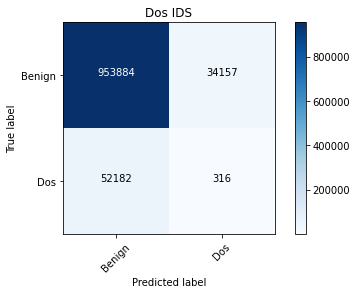

In [34]:
labels = ["Benign", "Dos"]
plot_confusion_matrix(cm = cm, classes = labels, title = "Dos IDS")

In [35]:
output_label16 = np.array(output_label16).reshape(len(output_label16))
res = np.array(res)
fpr, tpr, _ = roc_curve(output_label16,  res)
auc = roc_auc_score(output_label16, res)

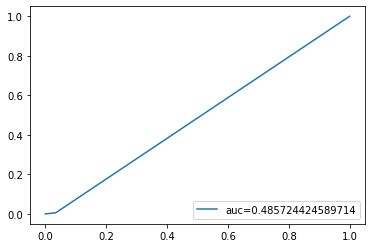

In [36]:
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4)
plt.show()